# Data Preparation: Feature Engineering

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Feature Extraction

### Label- und One-Hot-Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Categories
categories = np.array(['apple', 'apple', 'milk', 'banana', 'coffee'])

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Label encoding
label_encoded = labelencoder.fit_transform(categories)
label_encoded

array([0, 0, 3, 1, 2], dtype=int64)

In [3]:
# Creating instance of one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore')

# One Hot Encoding with numerical labels
ohe.fit_transform(label_encoded.reshape(-1, 1)).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [4]:
# One Hot Encoding with string labels
ohe.fit_transform(categories.reshape(-1, 1)).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

### Feature Hashing

In [5]:
# Import
from sklearn.feature_extraction import FeatureHasher

# Create instance of feature hasher
fh = FeatureHasher(input_type='string', n_features=5)

# Feature hashing
hash_encoded = fh.transform(categories).toarray()
hash_encoded

array([[ 1., -2.,  1.,  0.,  1.],
       [ 1., -2.,  1.,  0.,  1.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 3., -1.,  0.,  0., -2.],
       [ 0.,  0., -1.,  3.,  2.]])

### Bag of Words

In [6]:
# Import
from sklearn.feature_extraction.text import CountVectorizer

# Our documents
corpus = [
        'This is the first document.',
        'This is the second second document.',
        'And the third one.',
        'Is this the first document?',
        ]

# Create instance
vectorizer = CountVectorizer()

# Count words
count_vectors = vectorizer.fit_transform(corpus)
count_vectors.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

## Feature Selection

### Einfache Feature Selection

In [7]:
# Import
from sklearn.feature_selection import VarianceThreshold

# Data
X = np.array([[0, 0, 1],
              [0, 1, 0], 
              [1, 0, 0],
              [0, 1, 1],
              [0, 1, 0],
              [0, 1, 1]])

# Variance
X.var(axis=0)

array([0.13888889, 0.22222222, 0.25      ])

In [8]:
# Select features based on variance threshold
sel = VarianceThreshold(threshold=.15)
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### SelectKBest

In [9]:
# Import
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Data
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [10]:
# Select k best
X_new = SelectKBest(mutual_info_classif, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

## Feature Scaling

### Quantisierung: feste Klassengrößen

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Simulating data similar to 
data = np.random.lognormal(size=(100_000, 1))
df = pd.DataFrame(data)
df = df[df <= 20] * 500

Text(0.5, 1.0, '')

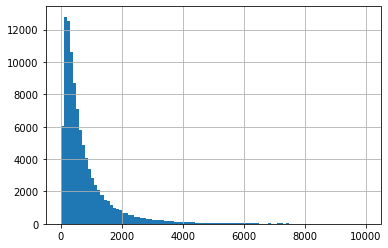

In [13]:
df.hist(bins=100)
plt.title('')

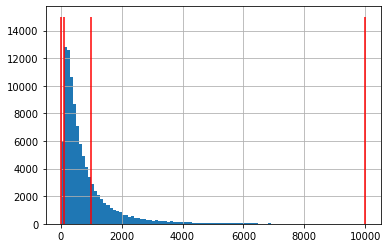

In [14]:
df.hist(bins=100)
plt.title('')
plt.vlines([10, 100, 1000, 10_000], ymin=0, ymax=1.5e4, color='r')

In [15]:
data = np.random.uniform(size=(10_000, 1))
df = pd.DataFrame(data) * 100

Text(0.5, 1.0, '')

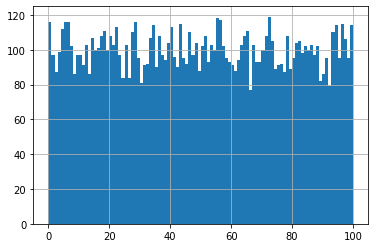

In [16]:
df.hist(bins=100)
plt.title('')

Text(0.5, 1.0, '')

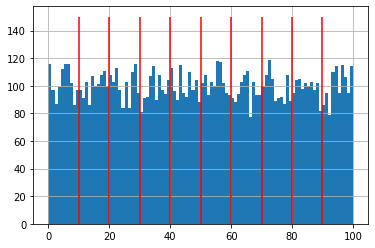

In [17]:
df.hist(bins=100)
plt.vlines([10, 20, 30, 40, 50, 60, 70, 80, 90], ymin=0, ymax=150, color='r')
plt.title('')

### Adaptive Klassengrößen

In [18]:
data = np.random.normal(size=(100_000, 1))
df = pd.DataFrame(data)
df = df[df <= 20] * 500

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

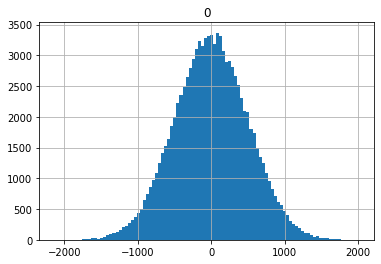

In [19]:
df.hist(bins=100)

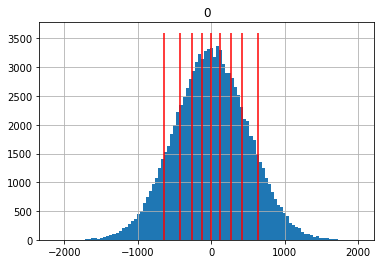

In [20]:
deziles = df.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
df.hist(bins=100)
plt.vlines(deziles, ymin=0, ymax=3600, color='r')

### MinMax-Transformation

In [21]:
# Data
X = np.random.randn(10, 5)

In [22]:
# MinMax Transformation from scratch
max_value = 5
min_value = -3
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max_value - min_value) + min_value

In [23]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(min_value, max_value))
scaler.fit_transform(X)

array([[-2.87437659,  4.03489185,  1.721157  , -1.83505002, -1.53774381],
       [ 5.        ,  1.85961635, -0.49703438,  0.61238263, -1.3388361 ],
       [ 0.88220362,  0.67214346,  0.78909182,  3.79479224,  1.04762162],
       [ 2.40590475,  0.26856534,  5.        , -0.58233318,  5.        ],
       [ 2.68728098,  0.20547709, -2.3269682 ,  5.        , -1.78486249],
       [ 1.30363689,  0.94260753, -3.        , -0.91513731,  1.64367284],
       [ 0.41163935, -2.58645203,  0.60264987,  2.20589581, -0.02771143],
       [ 3.35646561,  5.        , -0.51683122, -3.        , -1.24242027],
       [-3.        , -3.        ,  2.31757251, -1.53023697, -3.        ],
       [ 0.38668538,  0.51020587,  1.38462532, -1.66637431, -2.94373402]])

### Standardisierung

In [24]:
# Import
from sklearn.preprocessing import StandardScaler

# Data
X = np.random.rand(200, 1)

# Mean, std
print(X.mean())
print(X.std())

0.47321914003220394
0.28491808432327165


In [25]:
# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Mean, std
print(X.mean())
print(X.std())

1.4210854715202004e-16
1.0


### Power Transformations

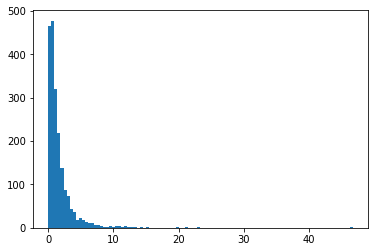

In [26]:
# Import
from sklearn.preprocessing import PowerTransformer

# Data
X = np.random.lognormal(size=(2000, 1))

# Histogram
plt.hist(X, bins=100)
plt.show()

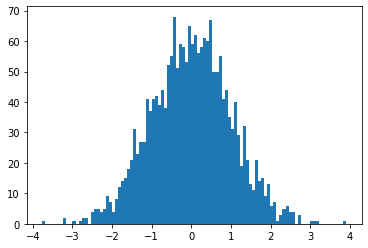

array([0.00583342])

In [27]:
# Transform
pt = PowerTransformer(method='box-cox')
X = pt.fit_transform(X)

# Histogram
plt.hist(X, bins=100)
plt.show()

# Box-Cox parameter
pt.lambdas_